In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [226]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [227]:
logs = pd.read_csv('./logs_844usa.csv')
logs['minutes'] = logs['duration'] / 60

In [228]:
congress = pd.read_csv('./congress.csv')

In [229]:
merged = logs.merge(congress, left_on='to', right_on='phone')

In [230]:
num_total = len(merged)
num_busy = len(merged[merged['status'] == 'busy'])
print 'Total calls:', num_total
print 'Total busy:', num_busy
print 'Busy ratio:', float(num_busy) / num_total * 100, '%'
print
print 'Average call duration (s):', merged['duration'].mean()
print 'Median call duration (s):', merged['duration'].median()

nonzero = merged[merged['duration'] > 0]
print 'Average non-zero call duration (s):', nonzero['duration'].mean()
print 'Median non-zero call duration (s):', nonzero['duration'].median()

print 'Longest call (minutes):', nonzero['duration'].max() / 60

Total calls: 15633
Total busy: 949
Busy ratio: 6.07049190814 %

Average call duration (s): 49.4805219727
Median call duration (s): 36.0
Average non-zero call duration (s): 63.3261563651
Median non-zero call duration (s): 49.0
Longest call (minutes): 25


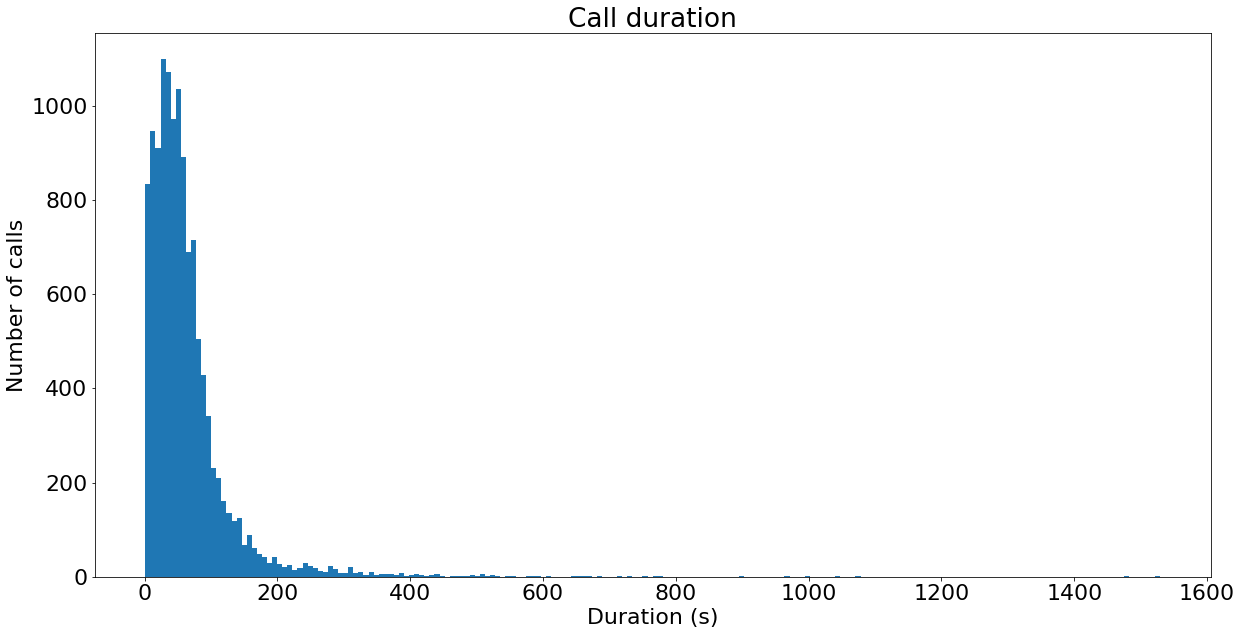

Max: 1529
Mean: 63.3261563651
Median: 49.0


In [249]:
# Duration histogram
durations = nonzero['duration']
plt.hist(durations, bins=200)
plt.gca().set_title('Call duration')
plt.gca().set_xlabel('Duration (s)')
plt.gca().set_ylabel('Number of calls')
plt.show()

print 'Max:', max(durations)
print 'Mean:', np.mean(durations)
print 'Median:', np.median(durations)

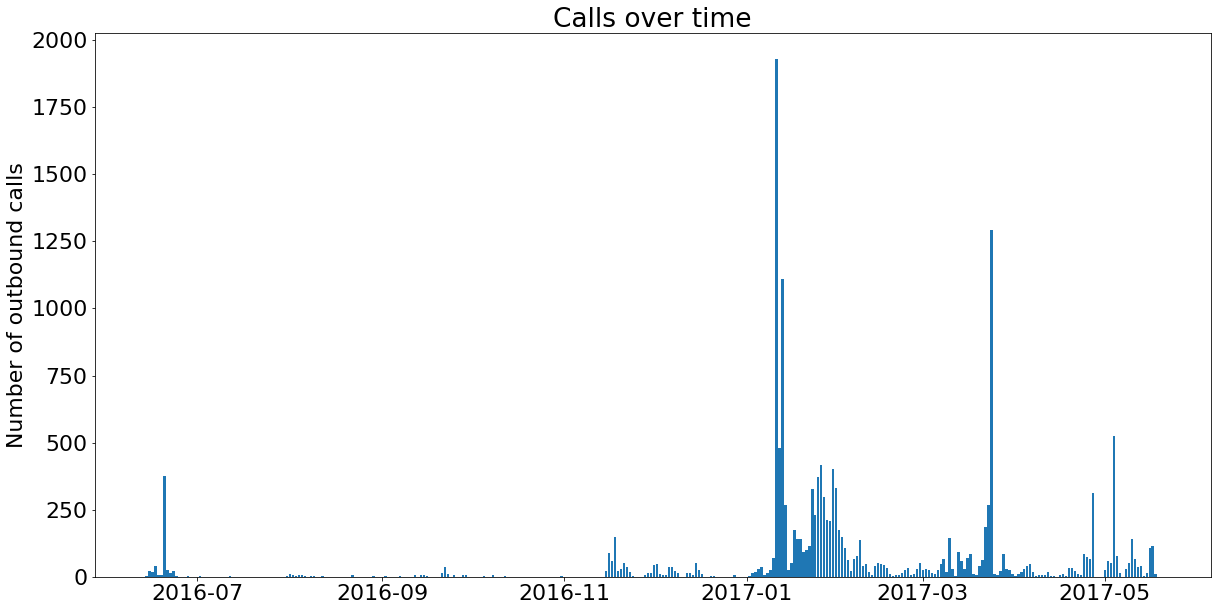

Max: 480 (2017-01-12)
Max: 526 (2017-05-04)
Max: 1108 (2017-01-13)
Max: 1929 (2017-01-11)
Max: 1293 (2017-03-24)
Mean: 69.7901785714
Median: 19.0


In [232]:
# Calls over time
dates = np.array(merged['time'], dtype='datetime64[D]')
uniques, counts = np.unique(dates, return_counts=True)
plt.bar(uniques, counts)

plt.gca().set_title('Calls over time')
plt.gca().set_ylabel('Number of outbound calls')
plt.show()

maxidx = np.argmax(counts)
# 1929: 2017-01-11, "Report claims Russia may have 'compromising' information on Trump"
# 1293: 2017-03-24, ACA repeal failed
# 1108: 2017-01-13, "Trump National Security Adviser Called Russian Envoy Day Before Sanctions Were Imposed"
# 526: 2017-05-04, Comey's "mild nausea" over thought he influenced election
# 480: 2017-01-12, Trump berates news media
maxindices = np.argpartition(counts, -5)[-5:]
for idx in maxindices:
    print 'Max:', '%d (%s)' % (counts[idx], uniques[idx])
print 'Mean:', np.mean(counts)
print 'Median:', np.median(counts)

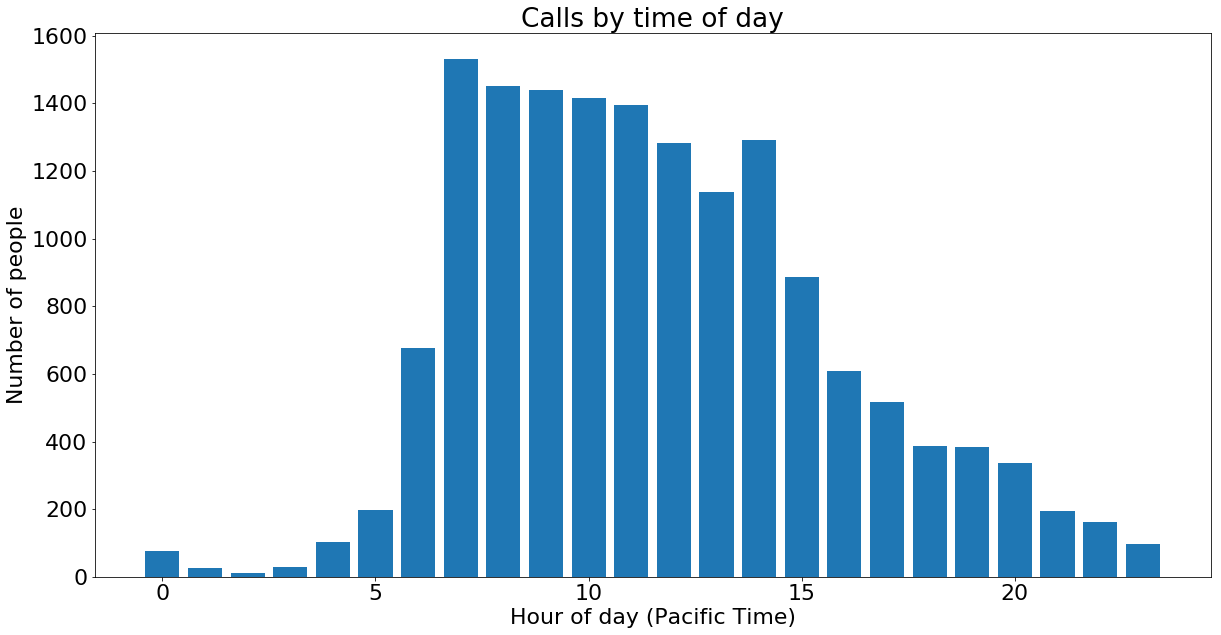

In [233]:
# Calls by time of day (PDT)
minutes = [(x.tolist().time().hour - 7)%24 for x in np.array(merged['time'], dtype='datetime64[m]')]
uniques, counts = np.unique(minutes, return_counts=True)
plt.bar(uniques, counts)
plt.gca().set_title('Calls by time of day')
plt.gca().set_xlabel('Hour of day (Pacific Time)')
plt.gca().set_ylabel('Number of people')
plt.show()

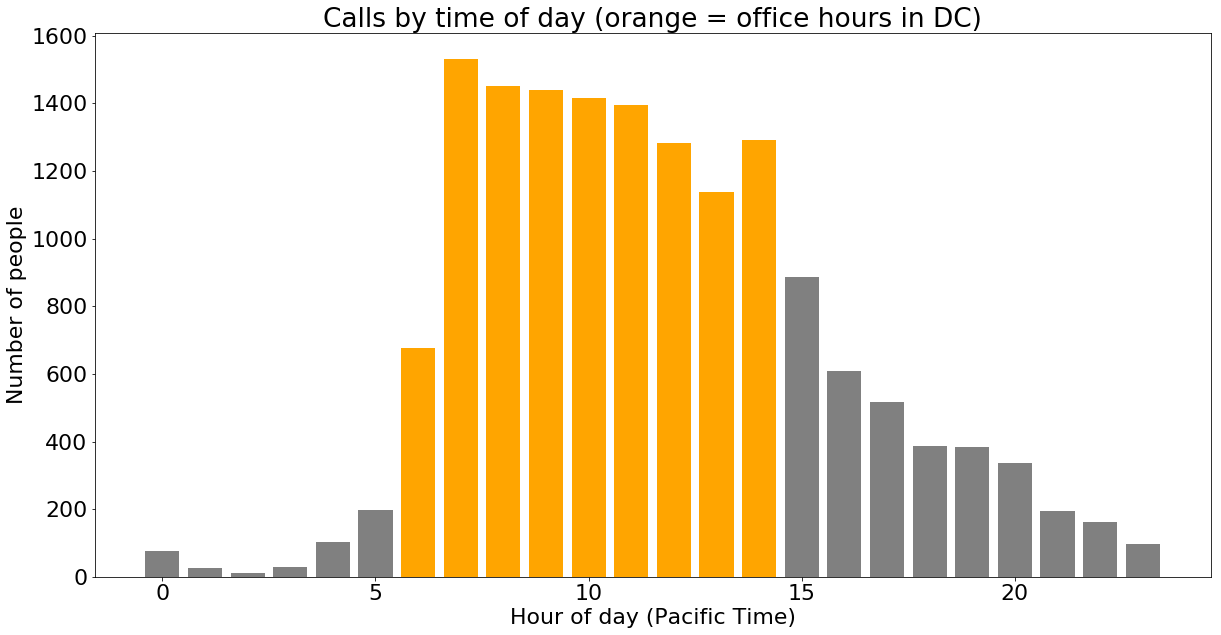

Num calls while open: 11619
Num calls while closed: 4014
% calls while open: 74.3235463443


In [234]:
# Calls by time of day (PDT), with congress open hours marked
hours = np.array([(x.tolist().time().hour - 7) % 24 for x in np.array(merged['time'], dtype='datetime64[m]')])

open_hours = hours[(hours >= 6) & (hours <= 14)]
closed_hours = hours[(hours < 6) | (hours > 14)]

uniques2, counts2 = np.unique(open_hours, return_counts=True)
plt.bar(uniques2, counts2, color='orange')

uniques, counts = np.unique(closed_hours, return_counts=True)
plt.bar(uniques, counts, color='gray')

plt.gca().set_title('Calls by time of day (orange = office hours in DC)')
plt.gca().set_xlabel('Hour of day (Pacific Time)')
plt.gca().set_ylabel('Number of people')
plt.show()

num_calls_while_open = sum(counts2)
num_calls_while_closed = sum(counts)
print 'Num calls while open:', num_calls_while_open
print 'Num calls while closed:', num_calls_while_closed
print '% calls while open:', float(num_calls_while_open) / (num_calls_while_open + num_calls_while_closed) * 100

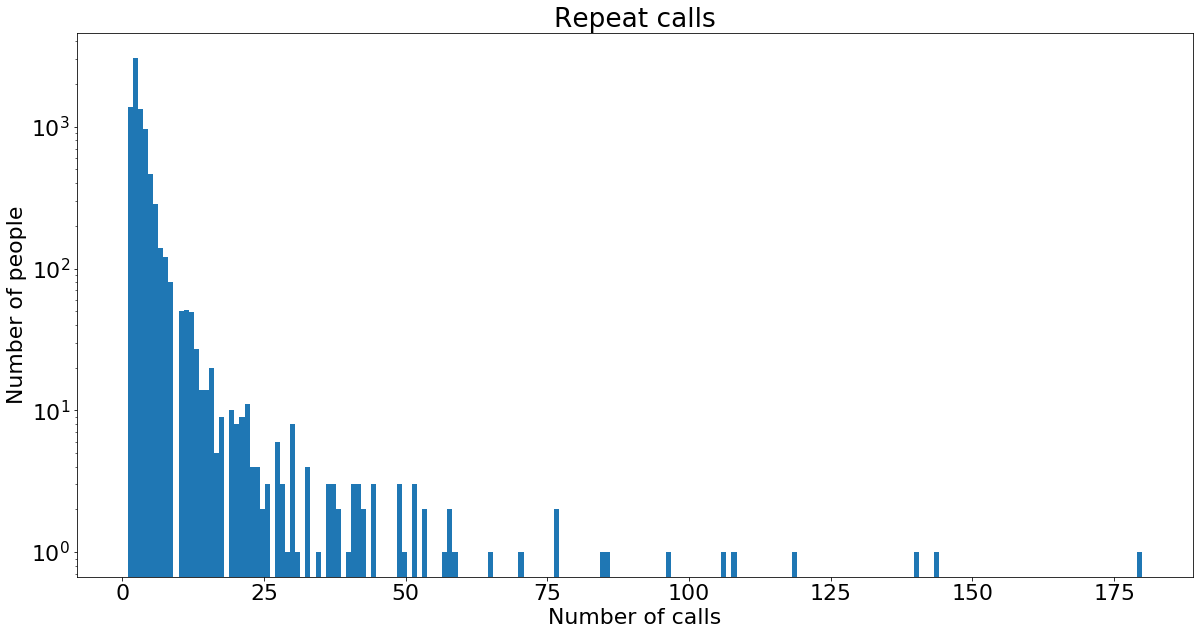

Max: 180
Mean: 3.6243282853
Median: 2.0


In [235]:
# Repeat calls
uniques, counts = np.unique(logs['from'], return_counts=True)
plt.hist(counts, bins=200)
plt.gca().set_yscale("log")
plt.gca().set_title('Repeat calls')
plt.gca().set_xlabel('Number of calls')
plt.gca().set_ylabel('Number of people')
plt.show()

print 'Max:', max(counts)     # caller in PA called 180 times
print 'Mean:', np.mean(counts)
print 'Median:', np.median(counts)

In [236]:
merged_group = merged.groupby(['to', 'person__name'])
merged_sum = merged_group.sum()
merged_count = merged_group.agg('count').sort_values(by='status', ascending=False)

In [237]:
merged_sum.sort_values(by=['minutes'], ascending=False)

,,duration,minutes,district
to,person__name,,,
(202) 224-3553,Sen. Kamala Harris [D-CA],44509,741.816667,NaN
(202) 224-6542,Sen. Charles “Chuck” Schumer [D-NY],38473,641.216667,NaN
(202) 224-5922,Sen. Ted Cruz [R-TX],24458,407.633333,NaN
(202) 224-3841,Sen. Dianne Feinstein [D-CA],21246,354.100000,NaN
(202) 224-5274,Sen. Bill Nelson [D-FL],20969,349.483333,NaN
(202) 224-4451,Sen. Kirsten Gillibrand [D-NY],19293,321.550000,NaN
(202) 224-6324,Sen. Robert “Bob” Casey [D-PA],19250,320.833333,NaN
(202) 224-2854,Sen. Tammy Duckworth [D-IL],14248,237.466667,NaN
(202) 224-4254,Sen. Patrick “Pat” Toomey [R-PA],12902,215.033333,NaN


In [238]:
busy = merged[merged['status'] == 'busy']
not_busy = merged[merged['status'] != 'busy']
busy_group = busy.groupby(['to', 'person__name'])

In [239]:
busiest = busy_group.agg('count').sort_values(by='status', ascending=False)

In [240]:
busiest.reset_index(inplace=True)

In [241]:
merged_count.reset_index(inplace=True)

In [242]:
busy_ratio = merged_count.merge(busiest, left_on='to', right_on='to')

In [243]:
busy_ratio['busy_ratio'] = busy_ratio['status_y'] / busy_ratio['status_x'] * 100

In [244]:
final = busy_ratio[['person__name_x', 'to', 'busy_ratio', 'status_x', 'status_y']].sort_values(by=['busy_ratio'], ascending=False)
final.columns = ['Person', 'Phone', 'Busy Ratio %', 'Total #', 'Busy #']

In [245]:
final

,Person,Phone,Busy Ratio %,Total #,Busy #
173,Rep. Mac Thornberry [R-TX13],(202) 225-3706,100.000000,1,1
156,Rep. Mike Coffman [R-CO6],(202) 225-7882,80.000000,5,4
169,Rep. Henry Cuellar [D-TX28],(202) 225-1640,66.666667,3,2
112,Rep. Josh Gottheimer [D-NJ5],(202) 225-4465,63.636364,11,7
33,Sen. Bob Corker [R-TN],(202) 224-3344,60.185185,108,65
159,Rep. Jeff Denham [R-CA10],(202) 225-4540,60.000000,5,3
172,Rep. Terri Sewell [D-AL7],(202) 225-2665,50.000000,2,1
171,Rep. Jeb Hensarling [R-TX5],(202) 225-3484,50.000000,2,1
146,Rep. Paul Tonko [D-NY20],(202) 225-5076,50.000000,6,3
128,Rep. Steve Womack [R-AR3],(202) 225-4301,44.444444,9,4


In [246]:
final[final['Total #'] > 10]

,Person,Phone,Busy Ratio %,Total #,Busy #
112,Rep. Josh Gottheimer [D-NJ5],(202) 225-4465,63.636364,11,7
33,Sen. Bob Corker [R-TN],(202) 224-3344,60.185185,108,65
101,Rep. Peter Roskam [R-IL6],(202) 225-4561,42.857143,14,6
3,Sen. Kirsten Gillibrand [D-NY],(202) 224-4451,39.371534,541,213
104,Rep. Darrell Issa [R-CA49],(202) 225-3906,38.461538,13,5
22,Sen. Lamar Alexander [R-TN],(202) 224-4944,37.241379,145,54
113,Rep. Steve Stivers [R-OH15],(202) 225-2015,36.363636,11,4
24,Sen. Richard Burr [R-NC],(202) 224-3154,28.057554,139,39
109,Rep. Peter DeFazio [D-OR4],(202) 225-6416,25.000000,12,3
100,Rep. Lloyd Doggett [D-TX35],(202) 225-4865,21.428571,14,3


In [247]:
merged_sum.reset_index().merge(final, left_on='person__name', right_on='Person')

,to,person__name,duration,minutes,district,Person,Phone,Busy Ratio %,Total #,Busy #
0,(202) 224-2023,Sen. Mark Warner [D-VA],6598,109.966667,NaN,Sen. Mark Warner [D-VA],(202) 224-2023,6.716418,134,9
1,(202) 224-2152,Sen. Richard Durbin [D-IL],6736,112.266667,NaN,Sen. Richard Durbin [D-IL],(202) 224-2152,1.098901,182,2
2,(202) 224-2235,Sen. John McCain [R-AZ],10258,170.966667,NaN,Sen. John McCain [R-AZ],(202) 224-2235,5.521472,163,9
3,(202) 224-2315,Sen. Sherrod Brown [D-OH],10069,167.816667,NaN,Sen. Sherrod Brown [D-OH],(202) 224-2315,2.234637,179,4
4,(202) 224-2541,Sen. Mitch McConnell [R-KY],1323,22.050000,NaN,Sen. Mitch McConnell [R-KY],(202) 224-2541,1.886792,53,1
5,(202) 224-2621,Sen. Patty Murray [D-WA],10735,178.916667,NaN,Sen. Patty Murray [D-WA],(202) 224-2621,2.136752,234,5
6,(202) 224-2742,Sen. Edward “Ed” Markey [D-MA],7374,122.900000,NaN,Sen. Edward “Ed” Markey [D-MA],(202) 224-2742,2.912621,103,3
7,(202) 224-2841,Sen. Jeanne Shaheen [D-NH],2348,39.133333,NaN,Sen. Jeanne Shaheen [D-NH],(202) 224-2841,5.263158,38,2
8,(202) 224-2854,Sen. Tammy Duckworth [D-IL],14248,237.466667,NaN,Sen. Tammy Duckworth [D-IL],(202) 224-2854,1.342282,298,4
9,(202) 224-2934,Sen. John Cornyn [R-TX],11650,194.166667,NaN,Sen. John Cornyn [R-TX],(202) 224-2934,1.687764,237,4
